In [1]:
import json
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
def densplot(columns, xlabel, title, axo):
    for i,v in enumerate(columns):
        sns.distplot(v, ax=axo, kde_kws={"label": i})
    axo.set_title(title)
    axo.set_xlabel(xlabel, fontsize=12)
    
def scatplot(xelem, yelem, xlabel, ylabel, title, axo, polyfit=None, xlim=None, ylim=None):
    axo.scatter(xelem, yelem)
    if polyfit:
        axo.plot(np.unique(xelem), np.poly1d(np.polyfit(xelem, yelem, polyfit))(np.unique(xelem)), 'C2')
    if xlim:
        axo.set_xlim(0,xlim)
    if ylim:
        axo.set_ylim(0,ylim)
    axo.set_title(title)
    axo.set_xlabel(xlabel, fontsize=12)
    axo.set_ylabel(ylabel, fontsize=12)

In [3]:
battles = pd.DataFrame([json.loads(line) for line in open("../datasets/battle-features-0.json")])
interest_col = ["strength_1", "strength_2", "casualties_1", "casualties_2"]
battles[interest_col].head()

,strength_1,strength_2,casualties_1,casualties_2
0,22000,42500,230,10500
1,0,0,0,0
2,6000,11000,0,4500
3,2700,2000,1050,250
4,47561,10900,10786,10897


There are  550  inconsistencies for combatant 1
There are  587  inconsistencies for combatant 2


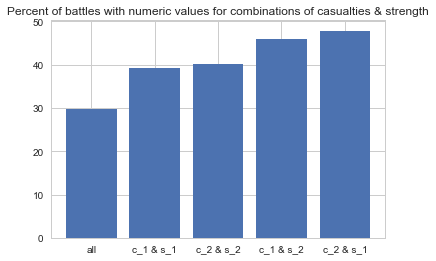

In [26]:
everything = battles.query('casualties_1 >1 and casualties_2 >1 and strength_1 >1 and strength_2 >1')
one = battles.query('casualties_1 >1 and strength_1 >1')
two = battles.query('casualties_2 >1 and strength_2 >1')

#remove inconsistencies
print("There are ", len(one.query('casualties_1 > strength_1 ')), " inconsistencies for combatant 1")
print("There are ", len(two.query('casualties_2 > strength_2 ')), " inconsistencies for combatant 2")
one = one[one['casualties_1'] <= one['strength_1']]
two = two[two['casualties_2'] <= two['strength_2']]
everything = everything[everything['casualties_1'] <= everything['strength_1']]
everything = everything[everything['casualties_2'] <= everything['strength_2']]

oneTwo = battles.query('casualties_1 >1 and strength_2 >1')
twoOne = battles.query('casualties_2 >1 and strength_1 >1')
totalPercent = 100/len(battles)
nbrValues = {'all' : len(everything)*totalPercent, 'c_1 & s_1' : len(one)*totalPercent, 'c_2 & s_2': len(two)*totalPercent, 'c_1 & s_2': len(oneTwo)*totalPercent, 'c_2 & s_1': len(twoOne)*totalPercent}
plt.bar(range(len(nbrValues)), nbrValues.values())
plt.title("Percent of battles with numeric values for combinations of casualties & strength")
plt.xticks(range(len(nbrValues)), nbrValues.keys())
plt.show()

We observe that 37% of the battles have information for both sides with the number of engaged people and casualties.

We have also checked for inconsistencies, e.g., more casualties than soldiers. And we dropped them for further analysis.

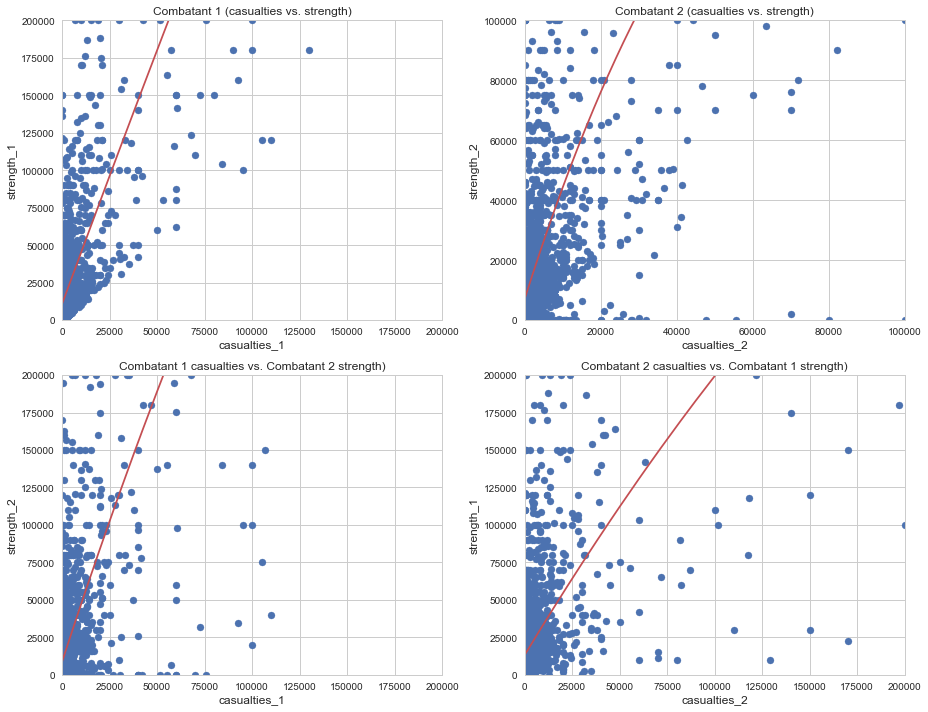

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(13,10))
scatplot(one['casualties_1'], one['strength_1'], 'casualties_1', 'strength_1', "Combatant 1 (casualties vs. strength)", ax1, 3, 200000, 200000)
scatplot(one['casualties_2'], one['strength_2'], 'casualties_2', 'strength_2', "Combatant 2 (casualties vs. strength)", ax2, 5, 100000, 100000)
scatplot(one['casualties_1'], one['strength_2'], 'casualties_1', 'strength_2', "Combatant 1 casualties vs. Combatant 2 strength)", ax3, 3, 200000, 200000)
scatplot(one['casualties_2'], one['strength_1'], 'casualties_2', 'strength_1', "Combatant 2 casualties vs. Combatant 1 strength)", ax4, 3, 200000, 200000)
fig.tight_layout()
plt.show()

We observe that on average, more soldiers also means more casualties.

In [27]:
losspercentages_1 = one['casualties_1']*100/one['strength_1']
losspercentages_2 = two['casualties_2']*100/two['strength_2']

comparative_lossPercent_1 = everything['casualties_1']*100/everything['strength_1']
comparative_lossPercent_2 = everything['casualties_2']*100/everything['strength_2']

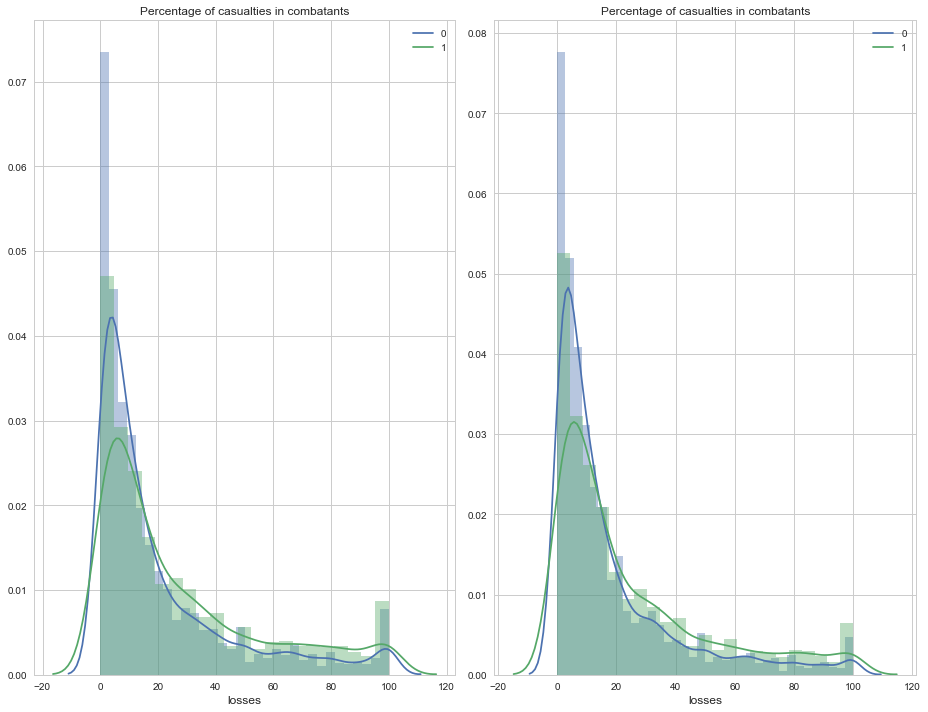

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(13,10))
densplot([losspercentages_1, losspercentages_2], "losses", "Percentage of casualties in combatants", ax1)
densplot([comparative_lossPercent_1, comparative_lossPercent_2], "losses", "Difference of percentage of casualties in combatants", ax2)
#scatplot(comparative_lossPercent_1, comparative_lossPercent_2, "losses_1", "losses_2", "Difference in percentages of casualties in combatants", ax2, 3)
fig.tight_layout()
plt.show()

#(xelem, yelem, xlabel, ylabel, title, axo, polyfit=None, xlim=None, ylim=None)

We observe that the distributions of the percentage of casualities are pretty similar for both combatants. This means that when one combatant had a lot of casualties, this seems to also be the case for the other.